In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

filename = "Salary_Dataset.csv"
df_dirty = pd.read_csv(filename)

df_dirty.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [64]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [92]:
df_dirty.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [93]:
df_dirty[df_dirty["Salaries Reported"].isnull()]

,Company Name,Job Title,Salaries Reported,Location,Salary
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


In [67]:
df_dirty[df_dirty["Company Name"].isnull()]

#novel_df = df;
#novel_df['Cabin'] = novel_df['Cabin'].fillna('NOCABIN')

,Company Name,Job Title,Salaries Reported,Location,Salary
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"


In [94]:
df = df_dirty.dropna(axis='rows')
df = df[df["Salaries Reported"].notnull()].copy()
df = df[df["Company Name"].notnull()].copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4339 non-null   object 
 1   Job Title          4339 non-null   object 
 2   Salaries Reported  4339 non-null   float64
 3   Location           4339 non-null   object 
 4   Salary             4339 non-null   object 
dtypes: float64(1), object(4)
memory usage: 203.4+ KB


In [69]:
df.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [95]:
# Taxa de câmbio (1 USD ≈ 83 INR)
TAXA_CAMBIO = 83.0

# Função para converter valores de salário para formato anual e numérico
def converter_para_anual(salario_str):
    if pd.isnull(salario_str):
        return None

    # Remove símbolo de moeda e vírgulas
    salario_str = salario_str.replace('₹', '').replace(',', '')

    # Extrai valor numérico e unidade (/yr, /mo, /hr)
    match = re.match(r"(\d+)(?:/(\w+))?", salario_str)

    if not match:
        return None

    valor = int(match.group(1))
    unidade = match.group(2)

    if unidade == 'mo':
        return valor * 12
    elif unidade == 'hr':
        return valor * 2080
    else:  # Assume anual ou unidade ausente
        return valor

# Converter para salário anual em INR
df["Salary_clean"] = df["Salary"].apply(converter_para_anual)

# Converter para dólares
df["Salary_usd"] = df["Salary_clean"] / TAXA_CAMBIO
df["Salary_usd"] = df["Salary_usd"].round(2)

df.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Salary_clean,Salary_usd
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573.0,7814.13
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950.0,14360.84
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874.0,10082.82
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578.0,8067.20
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110.0,11374.82


In [96]:
colunas_categoricas = ["Location"]
df_location = pd.get_dummies(df, columns=colunas_categoricas)
df_location.head()

,Company Name,Job Title,Salaries Reported,Salary,Salary_clean,Salary_usd,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_New Delhi,Location_Pune
0,Mu Sigma,Data Scientist,105.0,"₹6,48,573/yr",648573.0,7814.13,True,False,False,False,False
1,IBM,Data Scientist,95.0,"₹11,91,950/yr",1191950.0,14360.84,True,False,False,False,False
2,Tata Consultancy Services,Data Scientist,66.0,"₹8,36,874/yr",836874.0,10082.82,True,False,False,False,False
3,Impact Analytics,Data Scientist,40.0,"₹6,69,578/yr",669578.0,8067.20,True,False,False,False,False
4,Accenture,Data Scientist,32.0,"₹9,44,110/yr",944110.0,11374.82,True,False,False,False,False


Index(['Company Name', 'Job Title', 'Salaries Reported', 'Salary',
       'Salary_clean', 'Salary_usd', 'Location_Bangalore',
       'Location_Hyderabad', 'Location_Mumbai', 'Location_New Delhi',
       'Location_Pune'],
      dtype='object')


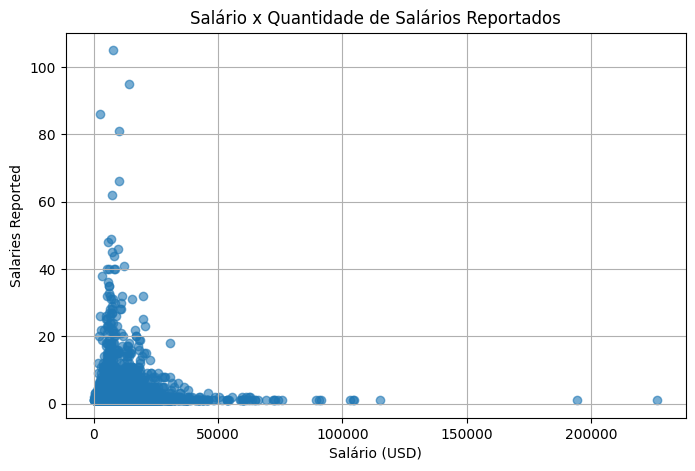

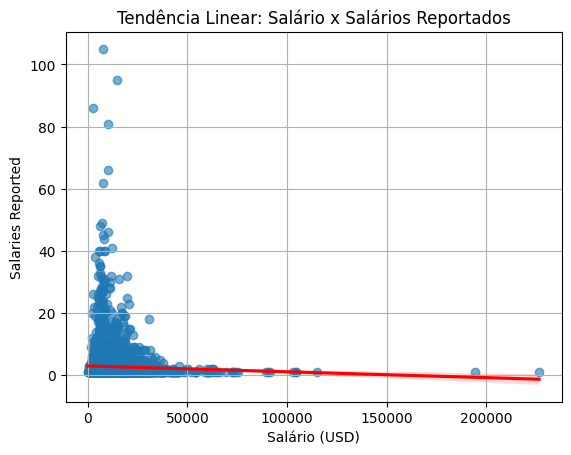

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# One-hot encoding da coluna 'Location'
colunas_categoricas = ["Location"]
df_location = pd.get_dummies(df, columns=colunas_categoricas)

# Aplicar .copy() para evitar SettingWithCopyWarning
#df_location = df_location[df_location["Location_Bangalore"] == 1].copy()

# Verifica se as colunas existem
print(df_location.columns)

# Agora extraia X e Y corretamente do df_location
X = df_location["Salary_usd"]
Y = df_location["Salaries Reported"]

# Gera o scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, alpha=0.6)
plt.xlabel("Salário (USD)")
plt.ylabel("Salaries Reported")
plt.title("Salário x Quantidade de Salários Reportados")
plt.grid(True)
plt.show()

import seaborn as sns

sns.regplot(x=X, y=Y, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.xlabel("Salário (USD)")
plt.ylabel("Salaries Reported")
plt.title("Tendência Linear: Salário x Salários Reportados")
plt.grid(True)
plt.show()